In [1]:
# Importing dependencies (for now)

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Explore the data

In [6]:
data = pd.read_csv('./data/data.csv')
data.head(5)

Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

In [8]:
data = data.drop('Unnamed: 0', axis = 1)

In [9]:
data

statement   status
0                                             oh my gosh  Anxiety
1      trouble sleeping, confused mind, restless hear...  Anxiety
2      All wrong, back off dear, forward doubt. Stay ...  Anxiety
3      I've shifted my focus to something else but I'...  Anxiety
4      I'm restless and restless, it's been a month n...  Anxiety
...                                                  ...      ...
53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040  Is there any way to sleep better? I can't slee...  Anxiety
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 2 columns]

In [10]:
classes = data['status'].unique()
classes

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [26]:
filtered_classes = {}
for cls in classes:
    filtered_classes[cls] = len(data[data['status'] == cls])

In [27]:
filtered_classes

{'Anxiety': 3888,
 'Normal': 16351,
 'Depression': 15404,
 'Suicidal': 10653,
 'Stress': 2669,
 'Bipolar': 2877,
 'Personality disorder': 1201}

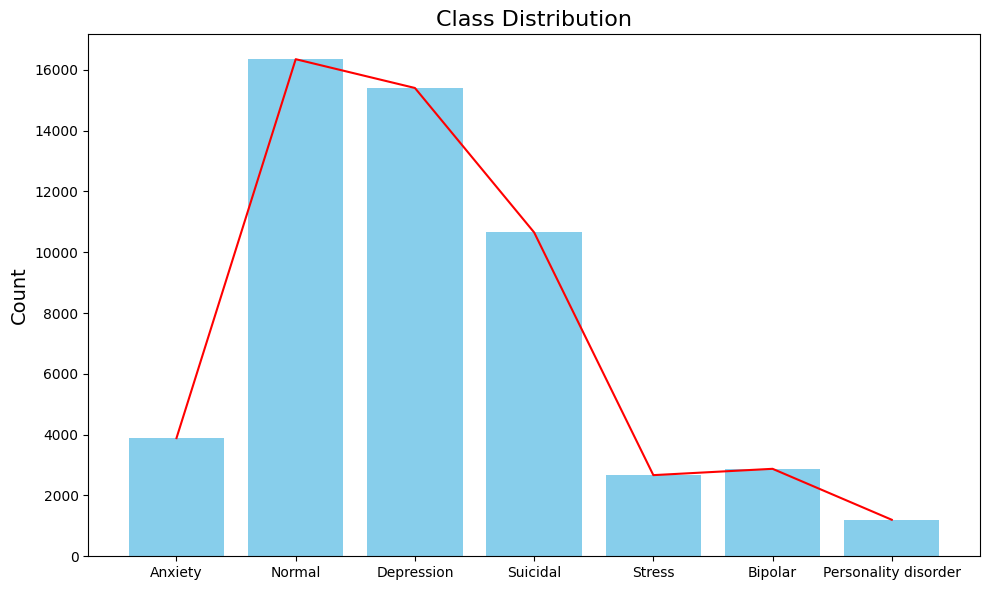

In [37]:
counts = list(filtered_classes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.plot(classes, counts, color = 'red')
plt.title('Class Distribution', fontsize=16)

plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

## Split the data

In [40]:
data = data.sample(frac = 1)
X = data['statement']
y = data['status']

1017         Normal
8002     Depression
26636      Suicidal
46474       Bipolar
36988      Suicidal
            ...    
19966    Depression
24650      Suicidal
19531      Suicidal
42364        Normal
7429       Suicidal
Name: status, Length: 53043, dtype: object